# 2 sample analysis- all cells



In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("ggplot2")
library("xlsx")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# MHb

trasncript

In [9]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary 200122_transcript.xlsx",sheetIndex=5)

In [18]:
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=c("HC","context","shock"))

In [19]:
head(Cell_number)

transcript,conditioning
16,HC
48,HC
35,HC
17,HC
16,HC
6,HC


In [20]:
test1<-subset(Cell_number,conditioning=="HC")[,1]
test2<-subset(Cell_number,conditioning=="context")[,1]
test3<-subset(Cell_number,conditioning=="shock")[,1]

In [25]:
p1<-wilcox.test(test1, test2, alternative = "two.sided")$p.value*3
p2<-wilcox.test(test1, test3, alternative = "two.sided")$p.value*3
p3<-wilcox.test(test2, test3, alternative = "two.sided")$p.value*3

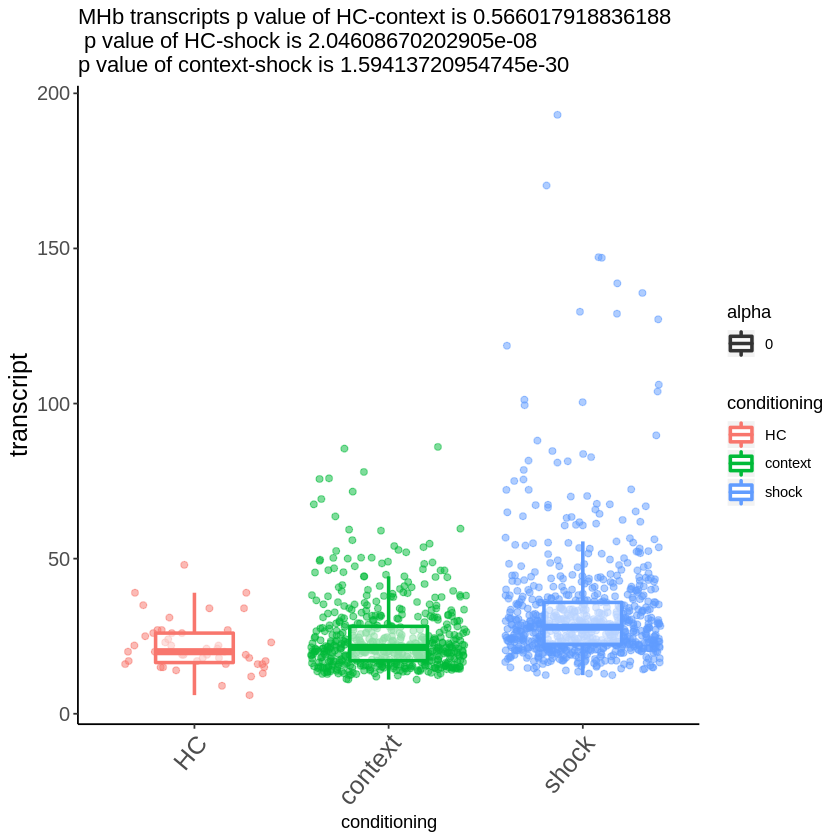

In [58]:
P<-ggplot(Cell_number,aes(x=conditioning,y=transcript,col=conditioning))
P + geom_jitter(width = 0.4, alpha = 0.5,size=1.6)+geom_boxplot(width=0.4,aes(color = conditioning, alpha = 0), size = 1,outlier.shape = NA,position = position_dodge(0.9)) +
  theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("MHb transcripts ","p value of HC-context is ",p1,"\n"," p value of HC-shock is ",p2,"\n","p value of context-shock is ",p3,sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/transcripts of Fos_MHb.pdf",width=5,height=8)

proportion AP breakdown

In [29]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/percentage of Fos AP distribution 200129.xlsx",sheetIndex=2)

In [30]:
Cell_number$conditioning<- factor(Cell_number$conditioning,levels=c("HC","context","shock"))

In [16]:
Cell_number

conditioning,Fos_positive,Fos_negative,total_cells,percentage,A.P
HC,19,3082,3101,0.6127056,anterior
HC,24,3828,3852,0.6230530,middle
HC,4,1768,1772,0.2257336,posterior
HC,47,8678,8725,0.5386819,whole
context,149,3579,3728,3.9967811,anterior
context,253,4597,4850,5.2164948,middle
context,134,2647,2781,4.8184106,posterior
context,536,10823,11359,4.7187252,whole
shock,248,3587,3835,6.4667536,anterior
shock,300,4574,4874,6.1551087,middle


In [31]:
Cell_number$conditioning<- factor(Cell_number$conditioning,levels=c("HC","context","shock"))
A_P<-c("anterior","middle","posterior","whole")
for (i in 1:length(A_P)){
compare<-c("HC","context")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p1_",A_P[i],sep=""),temp_f$p.value*3)}
       
for (i in 1:length(A_P)){
compare<-c("HC","shock")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p2_",A_P[i],sep=""),temp_f$p.value*3)}
       
for (i in 1:length(A_P)){
compare<-c("context","shock")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p3_",A_P[i],sep=""),temp_f$p.value*3)}

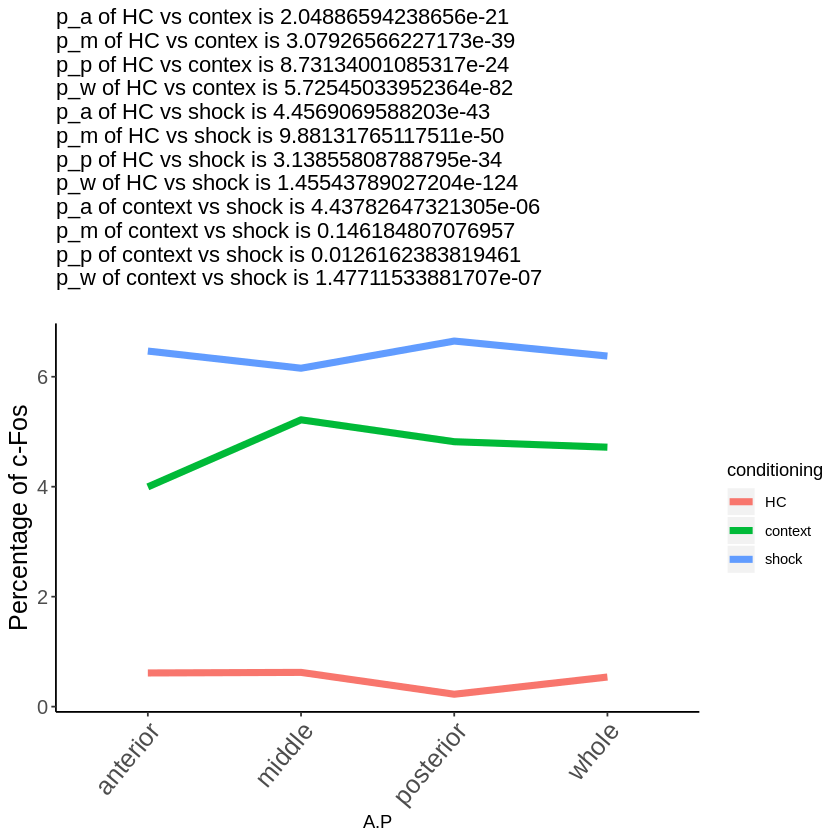

In [37]:
ggplot(Cell_number,aes(x=A.P,y=percentage,group=conditioning))+geom_line(aes(color=conditioning),size=2)+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+scale_fill_manual(values=c("grey", "blue","red"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("p_a of HC vs contex is ",p1_anterior,"\n","p_m of HC vs contex is ",p1_middle,"\n","p_p of HC vs contex is ",p1_posterior,"\n","p_w of HC vs contex is ",p1_whole,"\n",
              "p_a of HC vs shock is ",p2_anterior,"\n","p_m of HC vs shock is ",p2_middle,"\n","p_p of HC vs shock is ",p2_posterior,"\n","p_w of HC vs shock is ",p2_whole,"\n",
              "p_a of context vs shock is ",p3_anterior,"\n","p_m of context vs shock is ",p3_middle,"\n","p_p of context vs shock is ",p3_posterior,"\n","p_w of context vs shock is ",p3_whole,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_RNAscope_MHb_A_P_line.pdf",width=10,height=10)

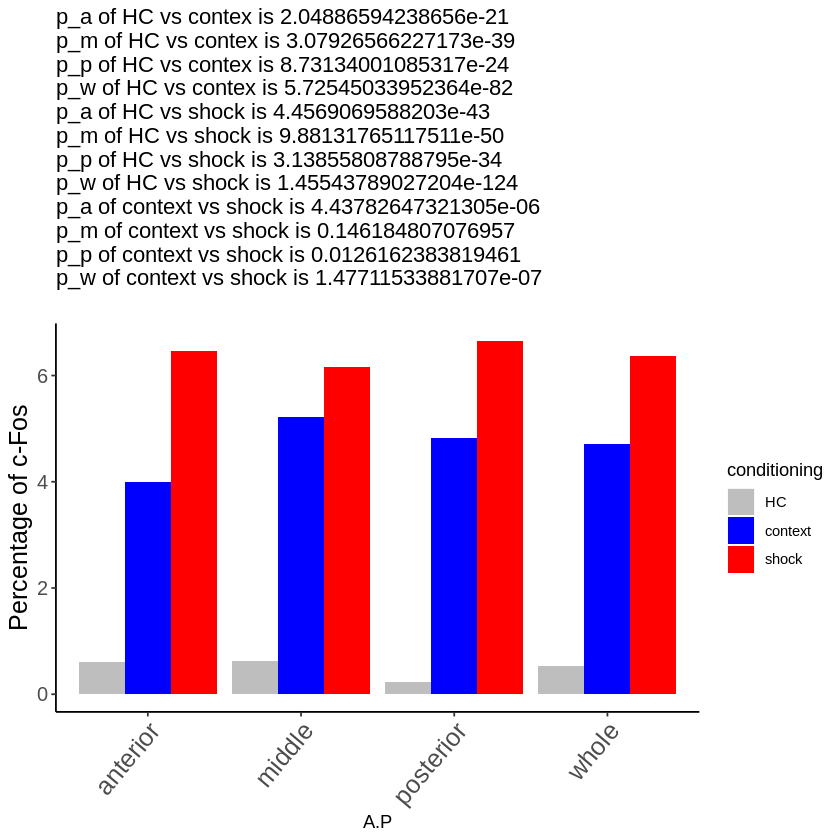

In [25]:
# proportion of c-fos_raw
ggplot(Cell_number,aes(x=A.P,y=percentage,fill=conditioning))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+scale_fill_manual(values=c("grey", "blue","red"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("p_a of HC vs contex is ",p1_anterior,"\n","p_m of HC vs contex is ",p1_middle,"\n","p_p of HC vs contex is ",p1_posterior,"\n","p_w of HC vs contex is ",p1_whole,"\n",
              "p_a of HC vs shock is ",p2_anterior,"\n","p_m of HC vs shock is ",p2_middle,"\n","p_p of HC vs shock is ",p2_posterior,"\n","p_w of HC vs shock is ",p2_whole,"\n",
              "p_a of context vs shock is ",p3_anterior,"\n","p_m of context vs shock is ",p3_middle,"\n","p_p of context vs shock is ",p3_posterior,"\n","p_w of context vs shock is ",p3_whole,"\n",sep=""))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_RNAscope_MHb_A_P.pdf",width=10,height=10)

proportion whole only


In [10]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary 200122_proportion.xlsx",sheetIndex=1)

In [15]:
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=Cell_number$conditioning)

In [17]:
Cell_number

conditioning,Fos_positive,Fos_negative,total.cells,percentage
HC,47,8678,8725,0.5386819
context,536,10823,11359,4.7187252
shock,726,10660,11386,6.3762515


In [20]:
# statistics
compare<-c("HC","context")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*3

compare<-c("HC","shock")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*3

compare<-c("context","shock")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*3

png 
  2

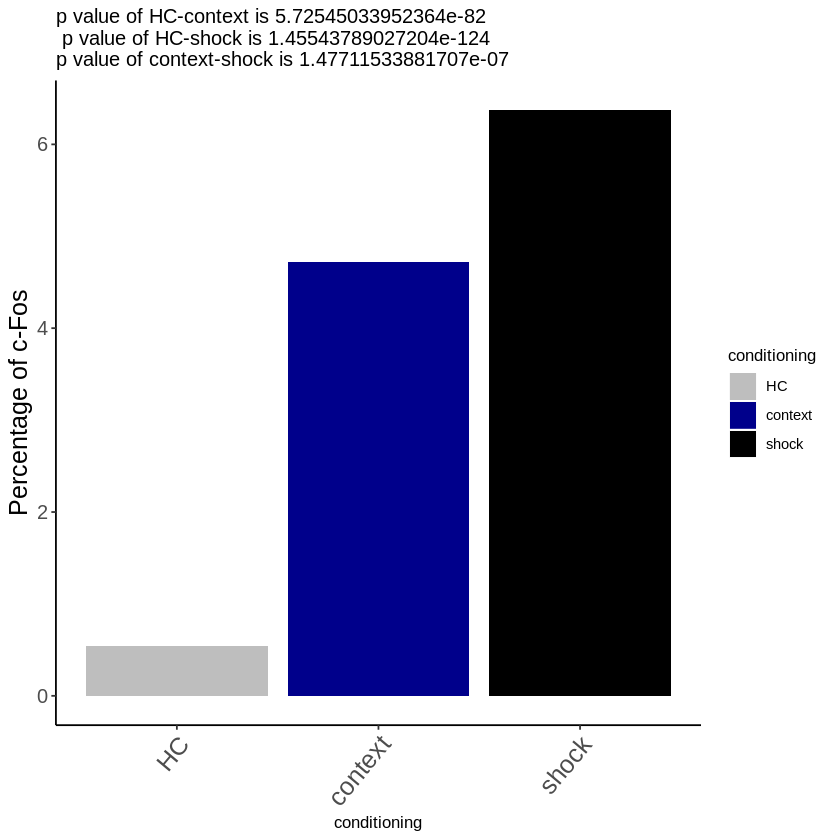

In [28]:
ggplot(Cell_number,aes(x=conditioning,y=percentage,fill=conditioning))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey","dark blue" ,"black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("p value of HC-context is ",p1,"\n"," p value of HC-shock is ",p2,"\n","p value of context-shock is ",p3,sep=""))
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/percentage of Fos_MHb.pdf")

In [82]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary 200122.xlsx",sheetIndex=4)

In [83]:
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=c("HC","context","shock"))
Cell_number$marker<-factor(Cell_number$marker,levels=c("spon1","cck"))

In [84]:
Cell_number

conditioning,overlap,marker,Pair
HC,15.384615,cck,1
HC,28.571429,cck,2
HC,7.692308,cck,3
HC,19.148936,cck,4
HC,23.076923,spon1,1
HC,28.571429,spon1,2
HC,7.692308,spon1,3
HC,21.276596,spon1,4
context,31.325301,cck,5
context,32.283465,cck,6


In [85]:
# statistics
group<-c("HC")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="cck")
compare2<-subset(compare,marker=="spon1")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p1<-3*res$p.value

group<-c("context")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="cck")
compare2<-subset(compare,marker=="spon1")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p2<-3*res$p.value

group<-c("shock")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="cck")
compare2<-subset(compare,marker=="spon1")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p3<-3*res$p.value

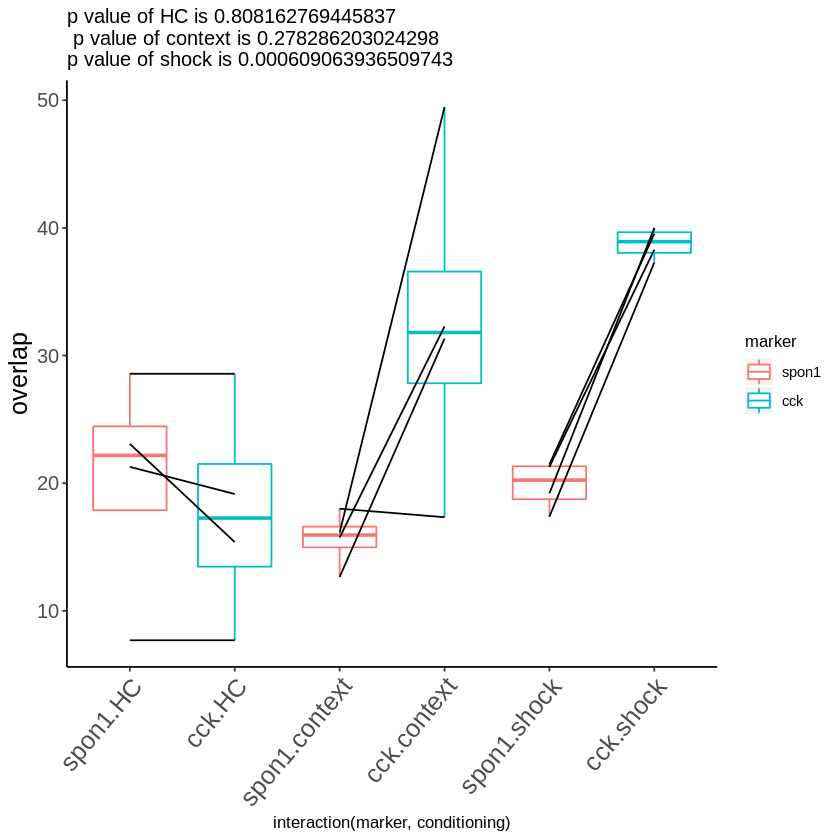

In [87]:
P<-ggplot(Cell_number,aes(x=interaction(marker,conditioning),y=overlap))+ scale_x_discrete() +geom_boxplot(aes(color = marker), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
geom_line(aes(group =interaction(Pair,conditioning))) +ggtitle("Fos overlap with markers (%)")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("p value of HC is ",p1,"\n"," p value of context is ",p2,"\n","p value of shock is ",p3,sep=""))
P
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos overlap with markers_MHb.pdf",width=10,height=10)

pie chart

In [49]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_percentage of markers 200130.xlsx",sheetIndex=2)
Cell_number$gene<-factor(Cell_number$gene,levels=rev(Cell_number$gene))

In [58]:
bp<- ggplot(Cell_number, aes(x="", y=percentage, fill=gene))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+ scale_fill_manual(values=c("grey","#E69F00", "#56B4E9","salmon"))+theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHbpie.pdf",width=10,height=10)

# LHb

In [59]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_percentage of markers 200130.xlsx",sheetIndex=2)
Cell_number$gene<-factor(Cell_number$gene,levels=rev(Cell_number$gene))
bp<- ggplot(Cell_number, aes(x="", y=percentage, fill=gene))+
geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0)+ scale_fill_manual(values=c("grey","#E69F00", "#56B4E9","salmon"))+theme_minimal()
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHbpie.pdf",width=10,height=10)

transcript

In [3]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb Shock vs No Shock vs HC_transcript.xlsx",sheetIndex=6)

In [4]:
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=c("HC","context","shock"))

In [5]:
test1<-subset(Cell_number,conditioning=="HC")[,1]
test2<-subset(Cell_number,conditioning=="context")[,1]
test3<-subset(Cell_number,conditioning=="shock")[,1]

In [6]:
p1<-wilcox.test(test1, test2, alternative = "two.sided")$p.value*3
p2<-wilcox.test(test1, test3, alternative = "two.sided")$p.value*3
p3<-wilcox.test(test2, test3, alternative = "two.sided")$p.value*3

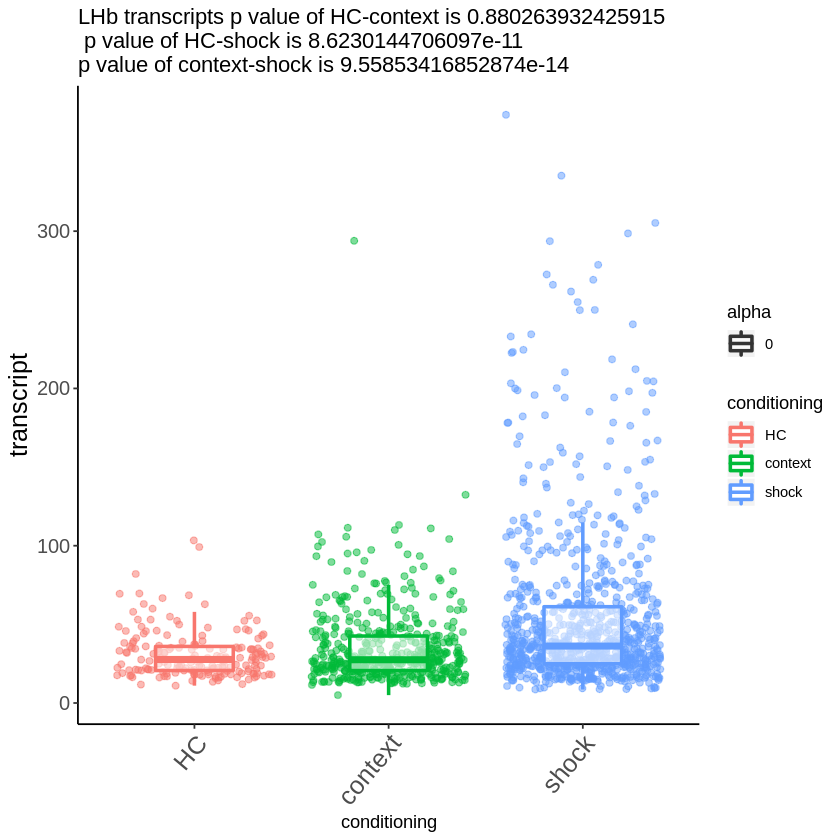

In [7]:
P<-ggplot(Cell_number,aes(x=conditioning,y=transcript,col=conditioning))
P + geom_jitter(width = 0.4, alpha = 0.5,size=1.6)+geom_boxplot(width=0.4,aes(color = conditioning, alpha = 0), size = 1,outlier.shape = NA,position = position_dodge(0.9)) +
  theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("LHb transcripts ","p value of HC-context is ",p1,"\n"," p value of HC-shock is ",p2,"\n","p value of context-shock is ",p3,sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/transcripts of Fos_LHb.pdf",width=5,height=8)

proprtion LHB AP break down


In [38]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/percentage of Fos AP distribution 200129.xlsx",sheetIndex=3)

In [39]:
Cell_number$conditioning<- factor(Cell_number$conditioning,levels=c("HC","context","shock"))
A_P<-c("anterior","middle","posterior","whole")
for (i in 1:length(A_P)){
compare<-c("HC","context")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p1_",A_P[i],sep=""),temp_f$p.value*3)}
       
for (i in 1:length(A_P)){
compare<-c("HC","shock")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p2_",A_P[i],sep=""),temp_f$p.value*3)}
       
for (i in 1:length(A_P)){
compare<-c("context","shock")
compare1<-subset(Cell_number,conditioning==compare[1] & A.P==A_P[i])
compare2<-subset(Cell_number,conditioning==compare[2]& A.P==A_P[i])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
assign(paste("p3_",A_P[i],sep=""),temp_f$p.value*3)}

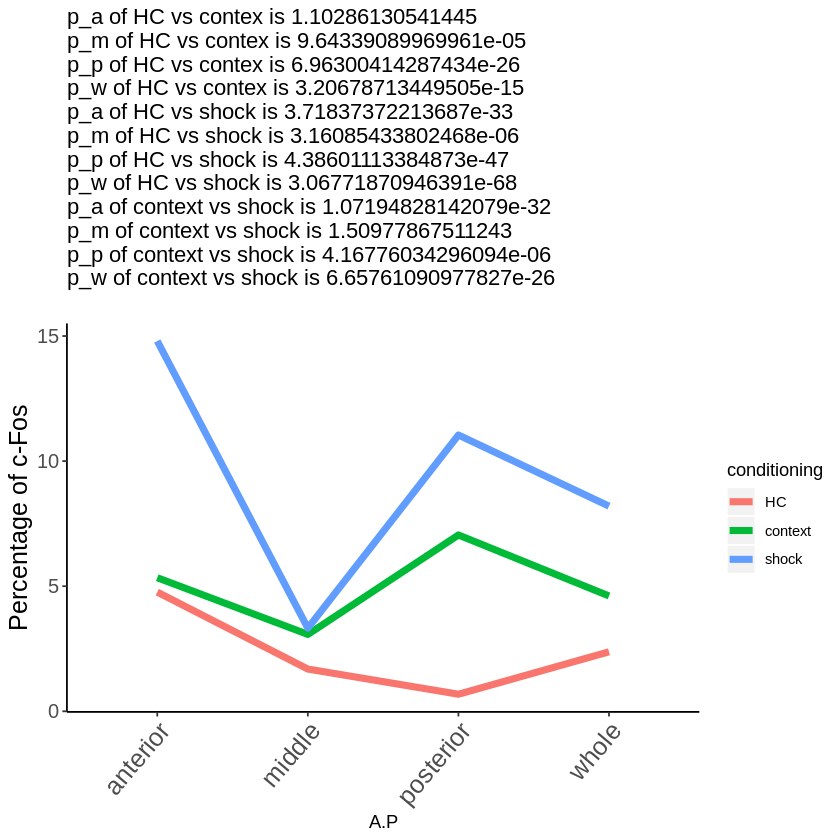

In [40]:
ggplot(Cell_number,aes(x=A.P,y=percentage,group=conditioning))+geom_line(aes(color=conditioning),size=2)+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+scale_fill_manual(values=c("grey", "blue","red"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("p_a of HC vs contex is ",p1_anterior,"\n","p_m of HC vs contex is ",p1_middle,"\n","p_p of HC vs contex is ",p1_posterior,"\n","p_w of HC vs contex is ",p1_whole,"\n",
              "p_a of HC vs shock is ",p2_anterior,"\n","p_m of HC vs shock is ",p2_middle,"\n","p_p of HC vs shock is ",p2_posterior,"\n","p_w of HC vs shock is ",p2_whole,"\n",
              "p_a of context vs shock is ",p3_anterior,"\n","p_m of context vs shock is ",p3_middle,"\n","p_p of context vs shock is ",p3_posterior,"\n","p_w of context vs shock is ",p3_whole,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_RNAscope_LHb_A_P_line.pdf",width=10,height=10)

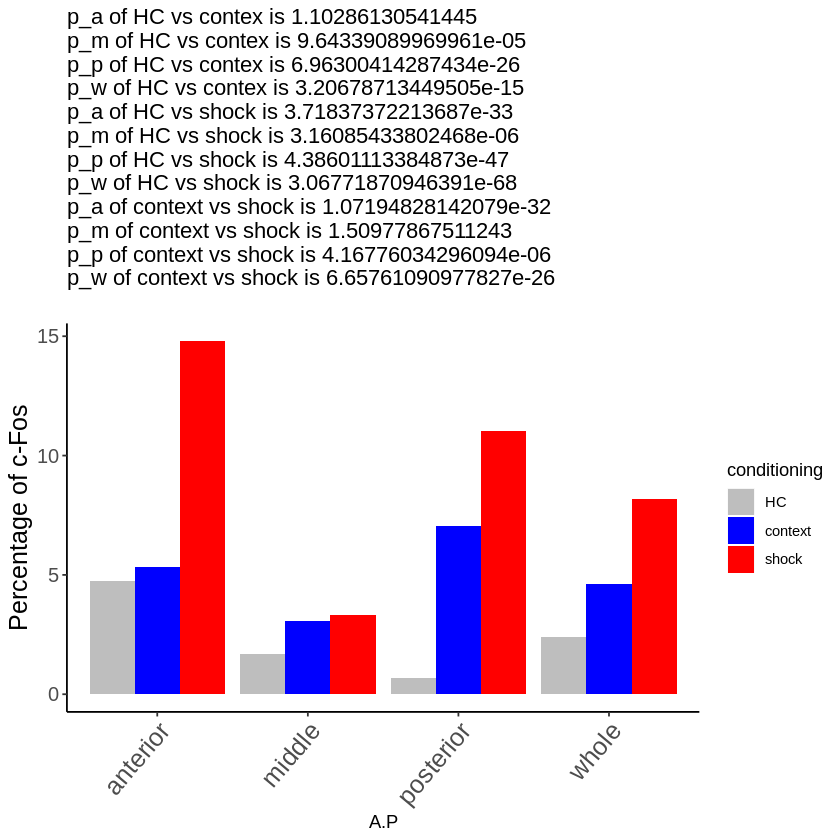

In [28]:
# proportion of c-fos_raw
ggplot(Cell_number,aes(x=A.P,y=percentage,fill=conditioning))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+scale_fill_manual(values=c("grey", "blue","red"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("p_a of HC vs contex is ",p1_anterior,"\n","p_m of HC vs contex is ",p1_middle,"\n","p_p of HC vs contex is ",p1_posterior,"\n","p_w of HC vs contex is ",p1_whole,"\n",
              "p_a of HC vs shock is ",p2_anterior,"\n","p_m of HC vs shock is ",p2_middle,"\n","p_p of HC vs shock is ",p2_posterior,"\n","p_w of HC vs shock is ",p2_whole,"\n",
              "p_a of context vs shock is ",p3_anterior,"\n","p_m of context vs shock is ",p3_middle,"\n","p_p of context vs shock is ",p3_posterior,"\n","p_w of context vs shock is ",p3_whole,"\n",sep=""))

ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_RNAscope_LHb_A_P.pdf",width=10,height=10)

In [63]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb Shock vs No Shock vs HC summary.xlsx",sheetIndex=2)

In [64]:
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=Cell_number$conditioning)

In [65]:
# statistics
compare<-c("HC","context")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*3

compare<-c("HC","shock")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*3

compare<-c("context","shock")
compare1<-subset(Cell_number,conditioning==compare[1])
compare2<-subset(Cell_number,conditioning==compare[2])
test = matrix(c(compare1$Fos_positive,compare1$Fos_negative,compare2$Fos_positive,compare2$Fos_negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*3

png 
  2

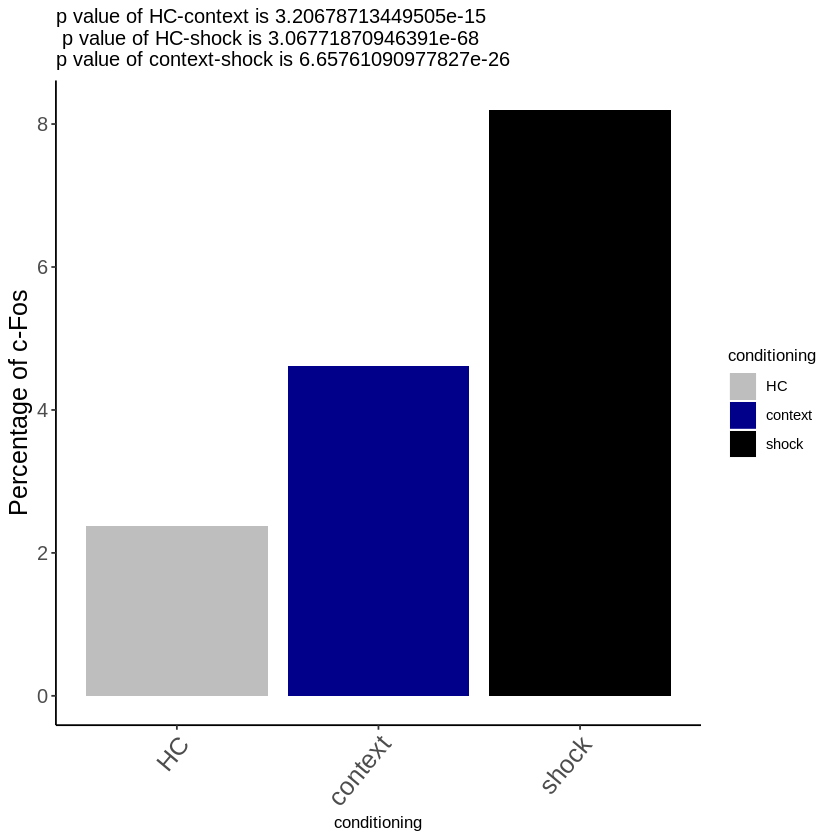

In [66]:
ggplot(Cell_number,aes(x=conditioning,y=percentage,fill=conditioning))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage of c-Fos")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")+scale_fill_manual(values=c("grey","dark blue" ,"black"))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("p value of HC-context is ",p1,"\n"," p value of HC-shock is ",p2,"\n","p value of context-shock is ",p3,sep=""))
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/percentage of Fos_LHb.pdf")

In [79]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb Shock vs No Shock vs HC summary.xlsx",sheetIndex=3)
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=c("HC","context","shock"))
Cell_number$marker<-factor(Cell_number$marker,levels=c("Lmo3","sv2c"))

In [80]:
# statistics
group<-c("HC")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="sv2c")
compare2<-subset(compare,marker=="Lmo3")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p1<-3*res$p.value

group<-c("context")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="sv2c")
compare2<-subset(compare,marker=="Lmo3")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p2<-3*res$p.value

group<-c("shock")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="sv2c")
compare2<-subset(compare,marker=="Lmo3")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p3<-3*res$p.value

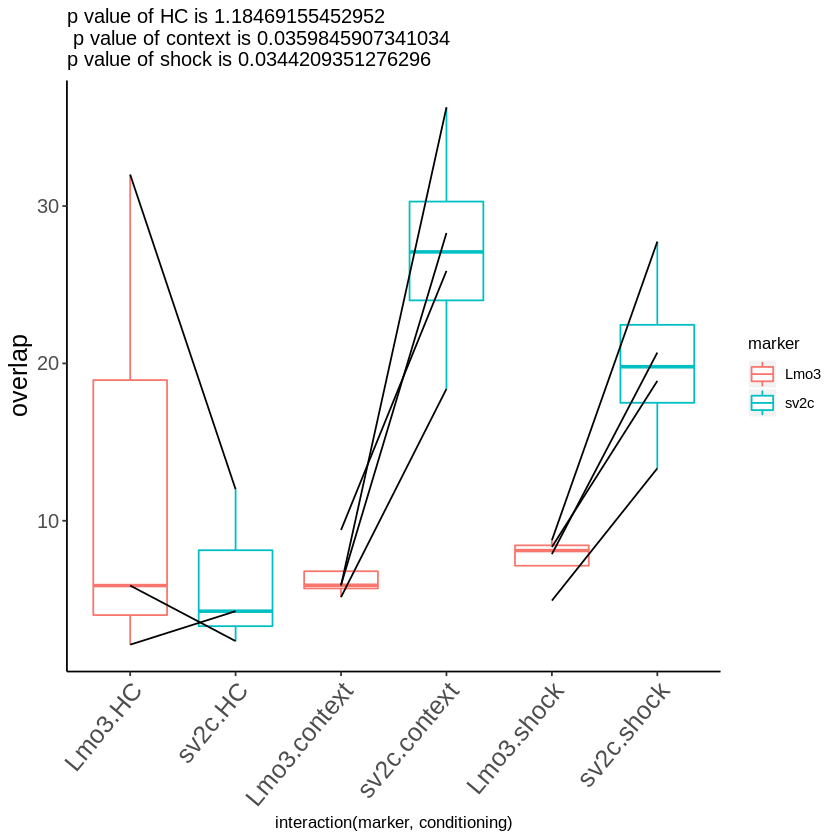

In [81]:
P<-ggplot(Cell_number,aes(x=interaction(marker,conditioning),y=overlap))+ scale_x_discrete() +geom_boxplot(aes(color = marker), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
geom_line(aes(group =interaction(Pair,conditioning))) +ggtitle("Fos overlap with markers (%)")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("p value of HC is ",p1,"\n"," p value of context is ",p2,"\n","p value of shock is ",p3,sep=""))
P
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos overlap with markers_LHb.pdf",width=10,height=10)

# marker MHb and LHb fos

In [61]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb Shock vs No Shock vs HC summary.xlsx",sheetIndex=4)
Cell_number$conditioning<-factor(Cell_number$conditioning,levels=c("MHb","LHb"))
Cell_number$marker<-factor(Cell_number$marker,levels=c("spon1","cck","Lmo3","sv2c"))

In [62]:
group<-c("MHb")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="spon1")
compare2<-subset(compare,marker=="cck")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p1<-3*res$p.value

group<-c("LHb")
compare<-subset(Cell_number,conditioning==group)
compare1<-subset(compare,marker=="sv2c")
compare2<-subset(compare,marker=="Lmo3")
res <-t.test(compare1$overlap, compare2$overlap,   paired=TRUE,alternative = "two.sided")
    p2<-3*res$p.value

In [63]:
Cell_number

conditioning,overlap,marker,Pair
MHb,37.288136,cck,1
MHb,39.548023,cck,2
MHb,40.000000,cck,3
MHb,38.297872,cck,4
MHb,17.372881,spon1,1
MHb,21.468927,spon1,2
MHb,19.200000,spon1,3
MHb,21.276596,spon1,4
LHb,8.333333,Lmo3,5
LHb,8.759124,Lmo3,6


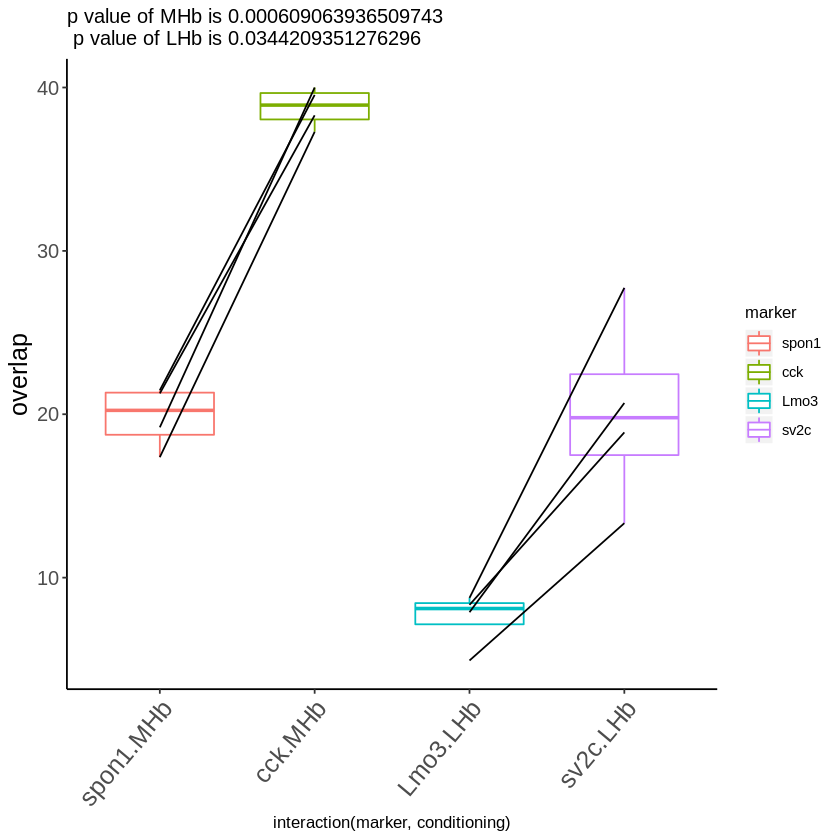

In [90]:
P<-ggplot(Cell_number,aes(x=interaction(marker,conditioning),y=overlap))+ scale_x_discrete() +geom_boxplot(aes(color = marker), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
geom_line(aes(group =interaction(Pair,conditioning))) +
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste("p value of MHb is ",p1,"\n"," p value of LHb is ",p2,sep=""))
P
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos overlap with markers_MandLHb.pdf",width=10,height=10)

In [64]:
Cell_number<-subset(Cell_number,conditioning=="LHb")

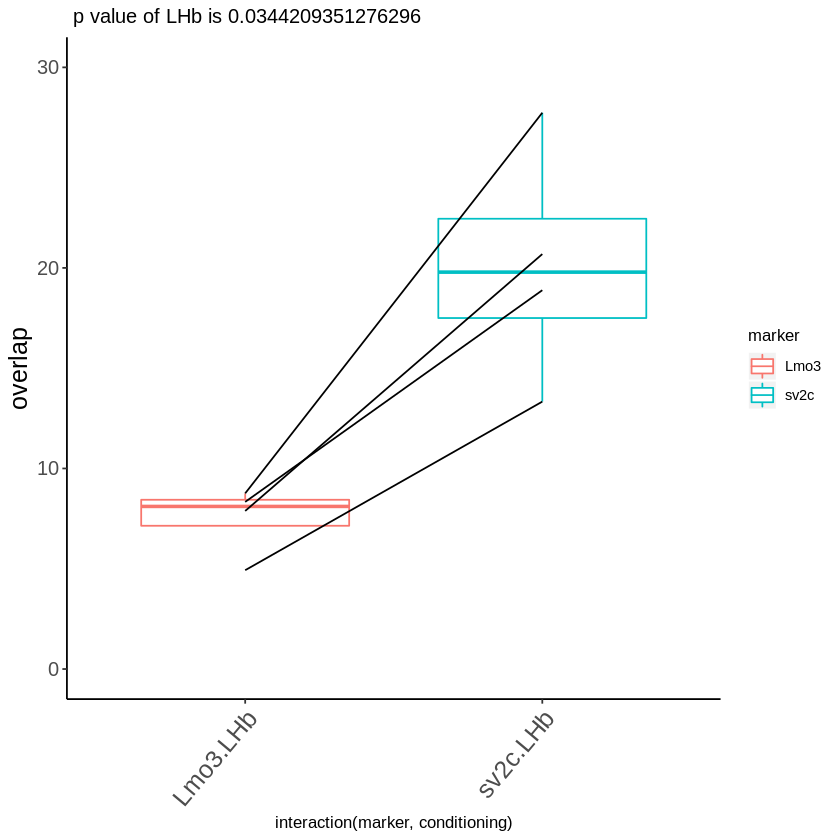

In [66]:
P<-ggplot(Cell_number,aes(x=interaction(marker,conditioning),y=overlap))+ scale_x_discrete() +geom_boxplot(aes(color = marker), width = 0.7, size = 0.5,outlier.shape = NA,position = position_dodge(0.9)) +
geom_line(aes(group =interaction(Pair,conditioning))) +ylim(0,30)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle(paste(" p value of LHb is ",p2,sep=""))
P
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos overlap with markers_LHb.pdf",width=5,height=10)

# 2D heatmap

In [7]:
library("scales")

In [75]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=1)

In [76]:
Cell_number$norm.y<- -Cell_number$norm.y

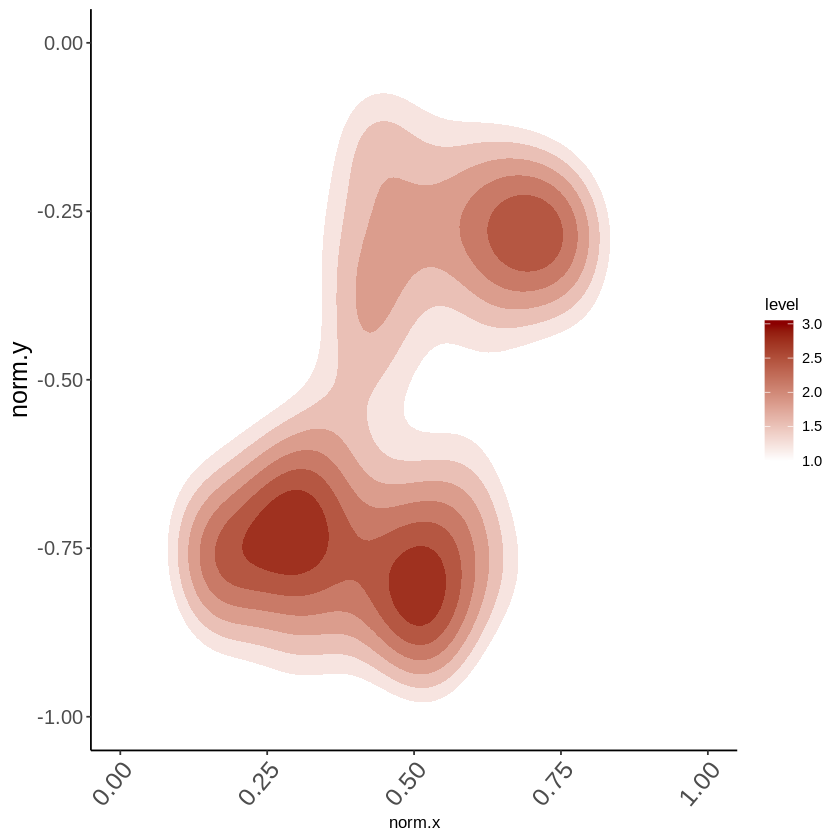

In [223]:
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
   scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,3))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+xlim(0,1)+ylim(-1,0)
P
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_anteiorMHb.pdf",width=10,height=10)

In [16]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=2)

In [17]:
Cell_number$norm.y<- -Cell_number$norm.y

In [18]:
library(scales)

Warning message:
“Removed 2 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 2 rows containing non-finite values (stat_density2d).”

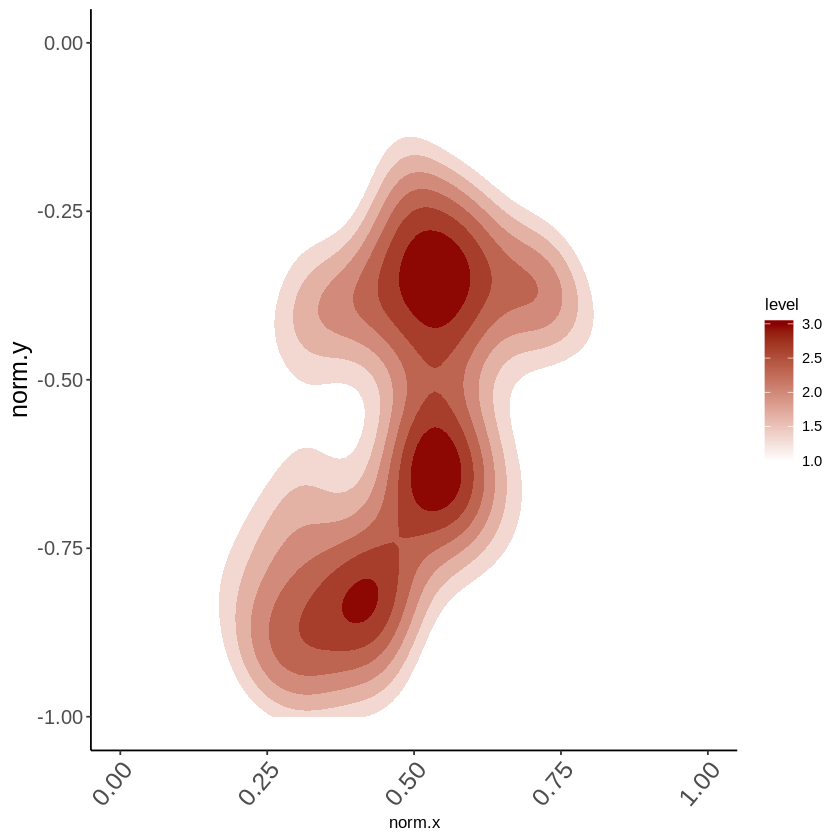

In [227]:
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
  scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,3))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
P+xlim(0,1)+ylim(-1,0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_middleMHb3.pdf",width=10,height=10)

In [20]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=3)

In [21]:
Cell_number$norm.y<- -Cell_number$norm.y

Warning message:
“Removed 4 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 4 rows containing non-finite values (stat_density2d).”

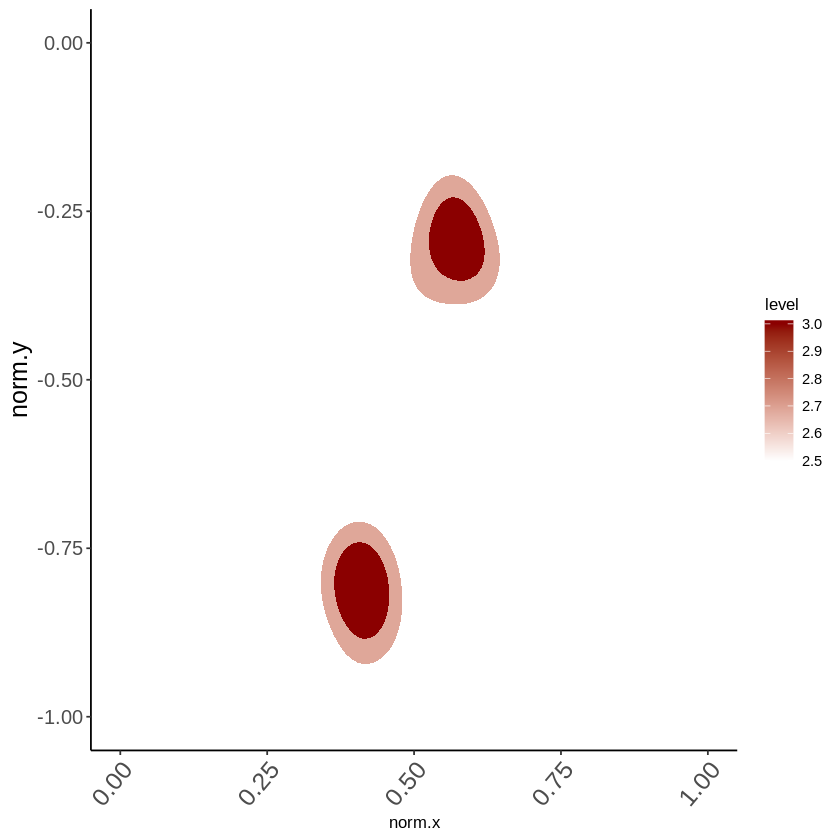

In [22]:
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
 scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,3))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
P+xlim(0,1)+ylim(-1,0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_posteriorMHb_1-3.pdf",width=10,height=10)

LHb

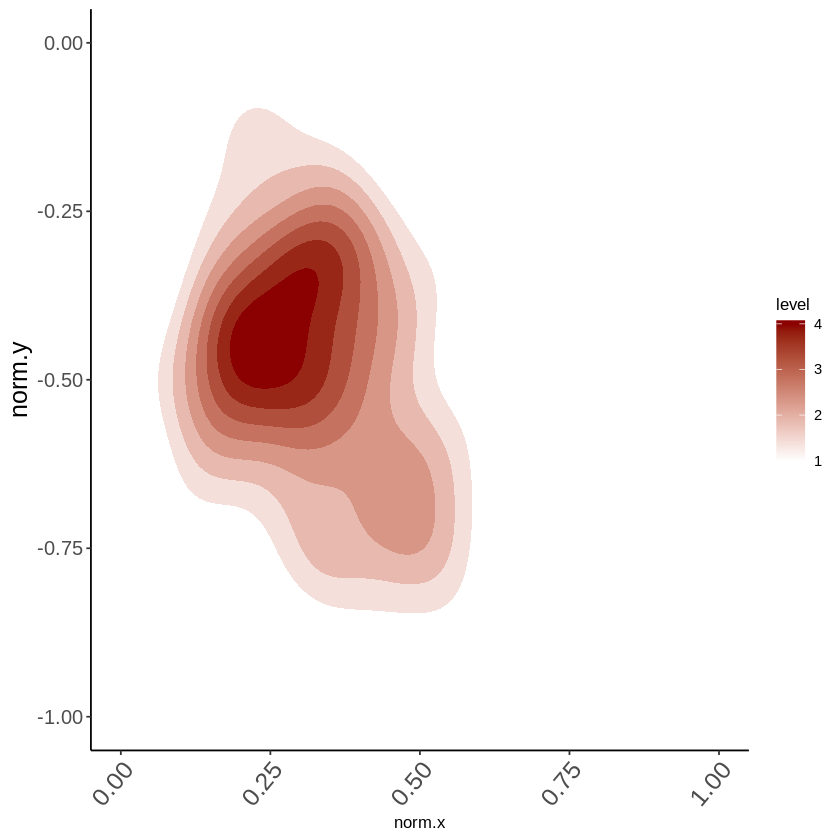

In [231]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=1)
Cell_number$norm.y<- -Cell_number$norm.y
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
   scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,4))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
P+xlim(0,1)+ylim(-1,0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_anteiorLHb.pdf",width=10,height=10)

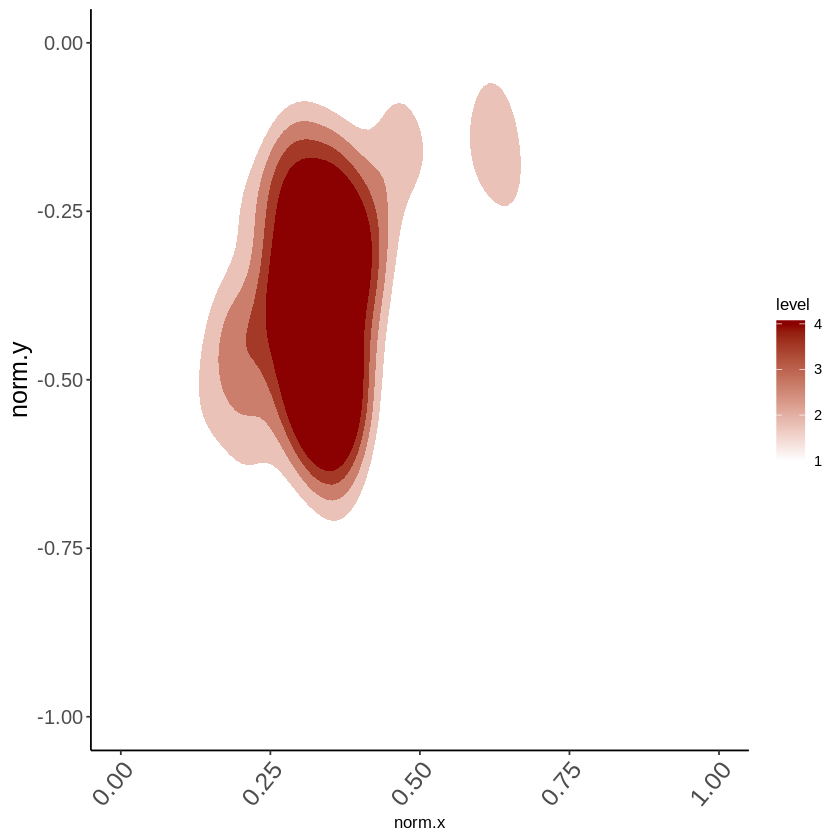

In [232]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=2)
Cell_number$norm.y<- -Cell_number$norm.y
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
   scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,4))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
P+xlim(0,1)+ylim(-1,0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_middleLHb.pdf",width=10,height=10)

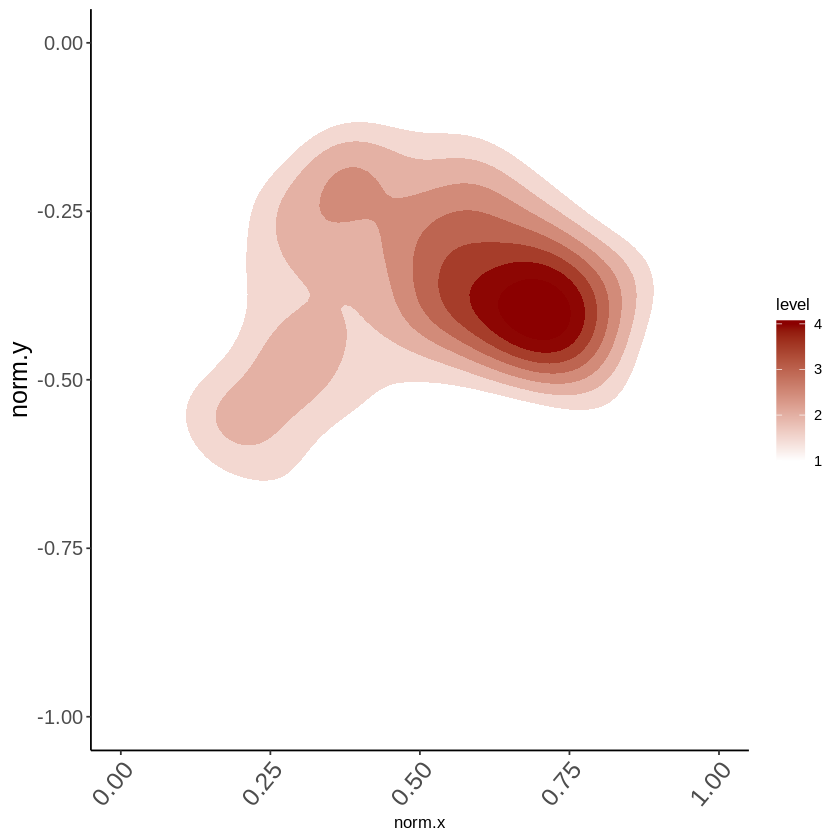

In [233]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=3)
Cell_number$norm.y<- -Cell_number$norm.y
P<-ggplot(Cell_number, aes(norm.x,norm.y))+ stat_density_2d(aes(fill = ..level..), geom = "polygon", bins = 10) +
  scale_fill_gradientn(colors = c( "white","darkred"), oob=squish,limits=c(1,4))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),title =element_text(size=10),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))
P+xlim(0,1)+ylim(-1,0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/Fos_posteriorLHb.pdf",width=10,height=10)

# integrating Hiplex and Fos density map

MHb

In [119]:
library(sp)
library(MASS)

In [229]:
Hiplex.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/0.07/Wothreshold/0.25_hiplex_allcells_3D.rds")
new.ident <- c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6")
names(x = new.ident) <- levels(x =Hiplex.integrated)
Hiplex.integrated<- RenameIdents(object =Hiplex.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hiplex.integrated@assays$RNA@data[,which(Idents(object=Hiplex.integrated) %in% new.ident[i])]))}
cluster<-numeric()
for(i in 1:dim(Hiplex.integrated@meta.data)[1]){
    cluster[i]<-new.ident[as.numeric(Hiplex.integrated@meta.data$seurat_clusters[i])]
}
cluster<-factor(cluster,levels=c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6"))
Hiplex.integrated@meta.data$cluster<-cluster

In [230]:
cells<-c(hMHb1_barcode,hMHb2_barcode,hMHb3_barcode,hMHb4_barcode,hMHb5_barcode,hMHb6_barcode)
Hiplex.integrated<-subset(Hiplex.integrated,cells=cells)
Anterior<-subset(Hiplex.integrated@meta.data,Z> -1.4)
Middle<-subset(Hiplex.integrated@meta.data,Z> -1.8 & Z< -1.5)
Posterior<-subset(Hiplex.integrated@meta.data,Z< -1.8)
color<-c("#800000","#000000","#42d4f4","#ffe119","#4363d8","#000075")
Anterior$Y<--Anterior$Y
Middle$Y<--Middle$Y
Posterior$Y<--Posterior$Y

In [231]:
#anteior
hMHb1<-subset(Anterior,cluster=="hMHb1")
hMHb2<-subset(Anterior,cluster=="hMHb2")
hMHb3<-subset(Anterior,cluster=="hMHb3")
hMHb4<-subset(Anterior,cluster=="hMHb4")
hMHb5<-subset(Anterior,cluster=="hMHb5")
hMHb6<-subset(Anterior,cluster=="hMHb6")

In [232]:
cell_type<-c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6")
object<-mget(cell_type)

RNAscope data, Fos

anteior MHb

In [233]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=1)
Cell_number$norm.y<- -Cell_number$norm.y

In [234]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [235]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[10]]$x, ls[[10]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}
## if you like to Plot
#hMHb6$region <- factor(inner)
#plot(Y ~ X, col=region, data=hMHb6, pch=15)
#contour(dens,  add=T)

In [236]:
overlap_anterior<-overlap
total_anterior<-total

overlap_middle

In [237]:
#middle
hMHb1<-subset(Middle,cluster=="hMHb1")
hMHb2<-subset(Middle,cluster=="hMHb2")
hMHb3<-subset(Middle,cluster=="hMHb3")
hMHb4<-subset(Middle,cluster=="hMHb4")
hMHb5<-subset(Middle,cluster=="hMHb5")
hMHb6<-subset(Middle,cluster=="hMHb6")
cell_type<-c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6")
object<-mget(cell_type)

In [238]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=2)
Cell_number$norm.y<- -Cell_number$norm.y

In [239]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [240]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[6]]$x, ls[[6]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}

In [241]:
overlap_middle<-overlap
total_middle<-total

overlap_posterior

In [242]:
#posterior
hMHb1<-subset(Posterior,cluster=="hMHb1")
hMHb2<-subset(Posterior,cluster=="hMHb2")
hMHb3<-subset(Posterior,cluster=="hMHb3")
hMHb4<-subset(Posterior,cluster=="hMHb4")
hMHb5<-subset(Posterior,cluster=="hMHb5")
hMHb6<-subset(Posterior,cluster=="hMHb6")
cell_type<-c("hMHb1","hMHb2","hMHb3","hMHb4","hMHb5","hMHb6")
object<-mget(cell_type)

In [243]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_FosrCckgSpon1fr_analysis summary Fos coordinate 200131.xlsx",sheetIndex=3)
Cell_number$norm.y<- -Cell_number$norm.y

In [244]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [245]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[11]]$x, ls[[11]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}

In [246]:
overlap_posterior<-overlap
total_posterior<-total

In [188]:
overlap<-overlap_anterior+overlap_middle+overlap_posterior
total<-total_anterior+total_middle+total_posterior
negative<-total-overlap
percentage<-100*overlap/total

In [247]:
overlap<-overlap_anterior+overlap_middle
total<-total_anterior+total_middle
negative<-total-overlap
percentage<-100*overlap/total

In [255]:
overlap<-overlap_anterior
total<-total_anterior
negative<-total-overlap
percentage<-100*overlap/total

In [260]:
overlap<-overlap_middle
total<-total_middle
negative<-total-overlap
percentage<-100*overlap/total

In [251]:
#or
overlap<-overlap_posterior
total<-total_posterior
negative<-total-overlap
percentage<-100*overlap/total

In [261]:
df<-data.frame("cell_type" = cell_type, "total" = total,"overlap"=overlap, "negative" =negative,"percentage"=percentage)

In [257]:
df

cell_type,total,overlap,negative,percentage
hMHb1,1557,229,1328,14.707771
hMHb2,1296,69,1227,5.324074
hMHb3,889,30,859,3.374578
hMHb4,667,85,582,12.743628
hMHb5,430,0,430,0.000000
hMHb6,338,3,335,0.887574


In [262]:
compare<-c(1,2)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*15

compare<-c(1,3)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*15

compare<-c(1,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*15

compare<-c(1,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p4<-temp_f$p.value*15

compare<-c(1,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p5<-temp_f$p.value*15

compare<-c(2,3)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p6<-temp_f$p.value*15

compare<-c(2,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p7<-temp_f$p.value*15

compare<-c(2,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p8<-temp_f$p.value*15

compare<-c(2,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p9<-temp_f$p.value*15

compare<-c(3,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p10<-temp_f$p.value*15

compare<-c(3,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p11<-temp_f$p.value*15

compare<-c(3,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p12<-temp_f$p.value*15

compare<-c(4,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p13<-temp_f$p.value*15

compare<-c(4,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p14<-temp_f$p.value*15

compare<-c(5,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p15<-temp_f$p.value*15

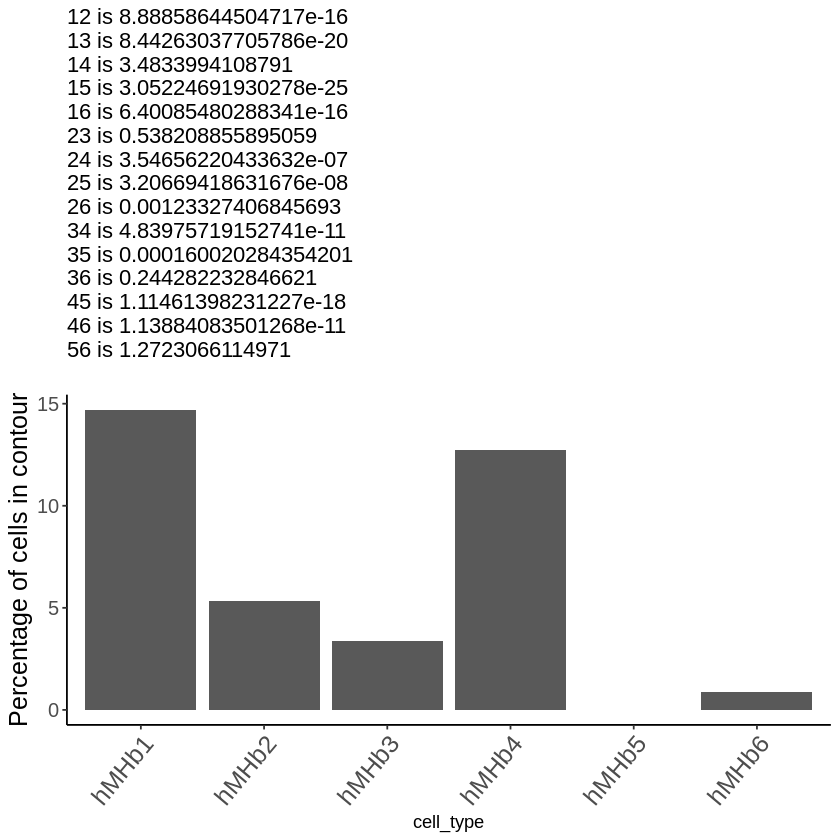

In [259]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_density contour_overlap_anterior.pdf",width=8,height=10)

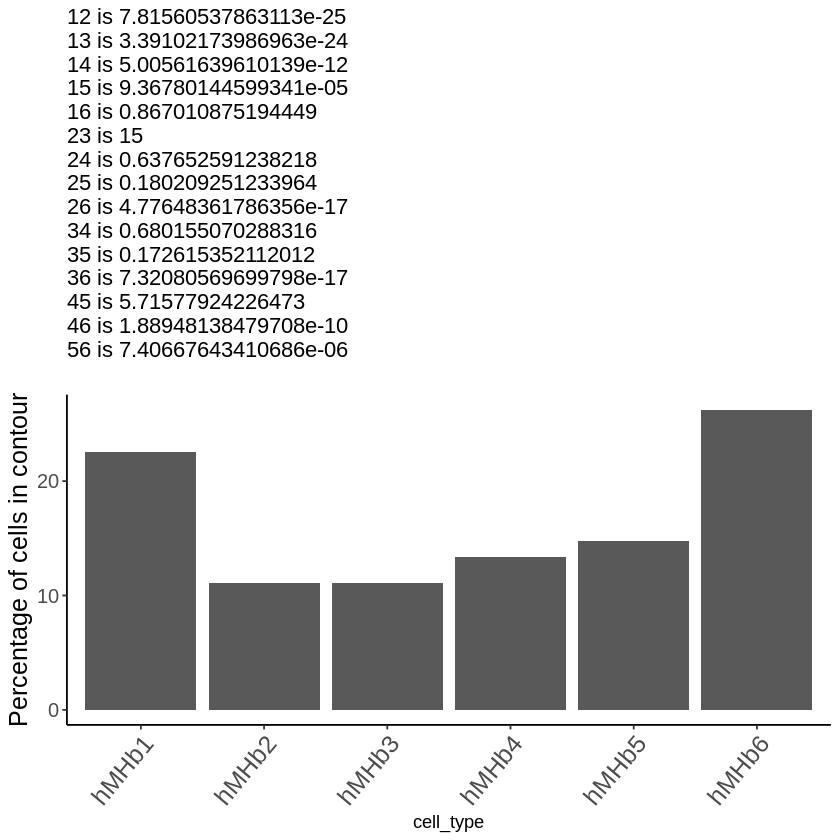

In [263]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_density contour_overlap_middle.pdf",width=8,height=10)

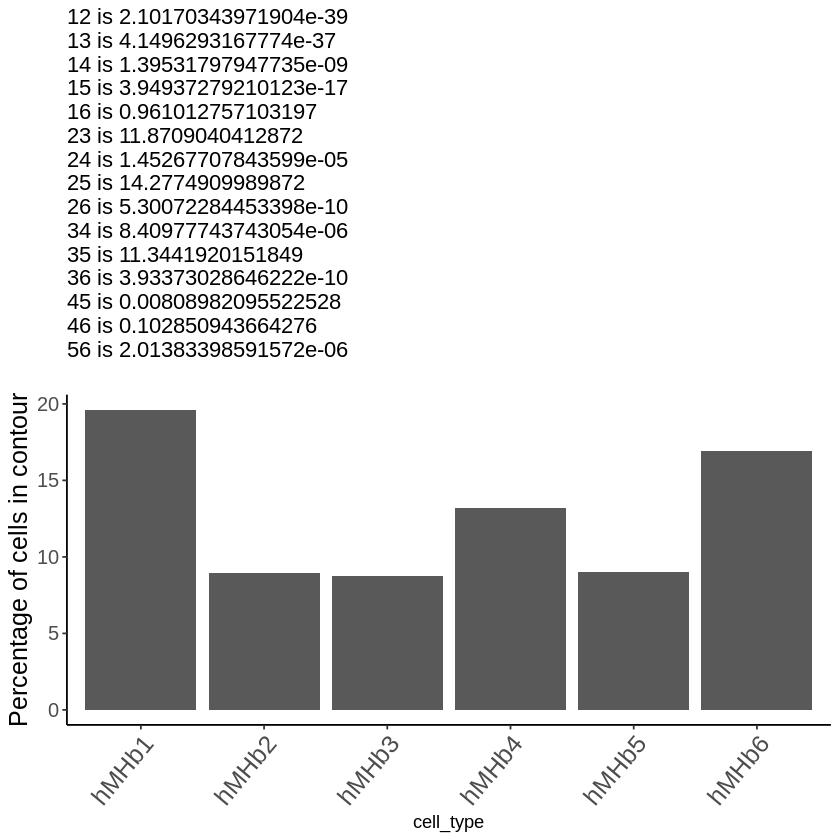

In [250]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_density contour_overlap_anteriorand middle.pdf",width=8,height=10)

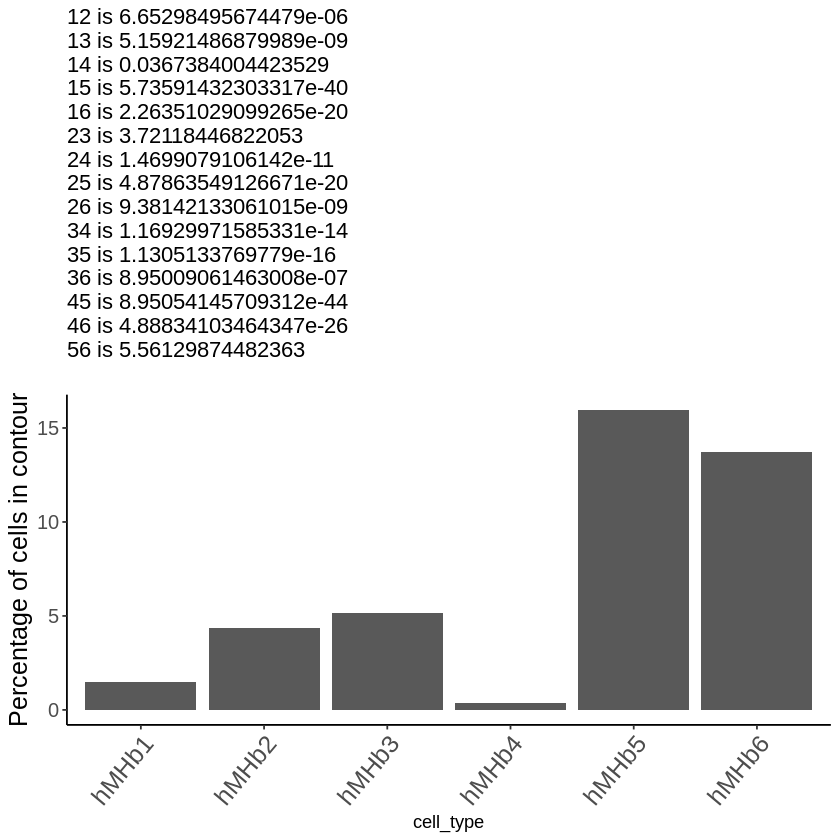

In [254]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_density contour_overlap_posterior.pdf",width=8,height=10)

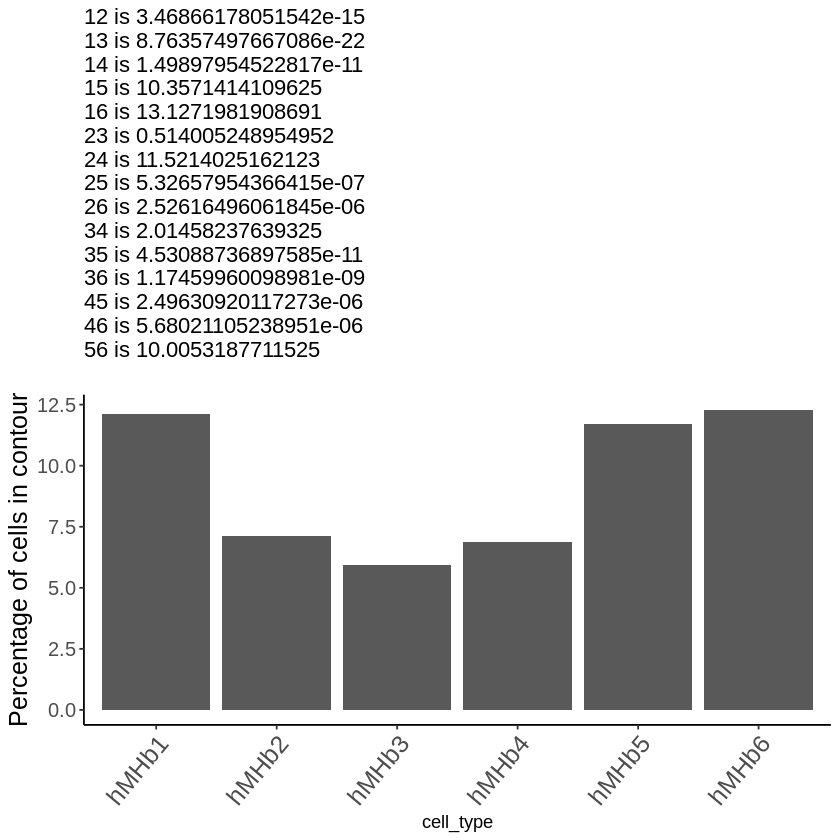

In [194]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/MHb_density contour_overlap.pdf",width=8,height=10)

# LHb

In [309]:
Hiplex.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Yoshiko/Hiplex/3D/LHb/0.04/0.1_hiplex_allcells_3D.rds")
new.ident <- c("hLHb1","hLHb2","hLHb3","hLHb4","hLHb5","hLHb6","hLHb7")
names(x = new.ident) <- levels(x =Hiplex.integrated)
Hiplex.integrated<- RenameIdents(object =Hiplex.integrated, new.ident)
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(Hiplex.integrated@assays$RNA@data[,which(Idents(object=Hiplex.integrated) %in% new.ident[i])]))}
Hiplex.integrated<-subset(Hiplex.integrated,cells=c(hLHb1_barcode,hLHb2_barcode,hLHb3_barcode,hLHb4_barcode,hLHb5_barcode,hLHb6_barcode))
cluster<-numeric()
for(i in 1:dim(Hiplex.integrated@meta.data)[1]){
    cluster[i]<-new.ident[as.numeric(Hiplex.integrated@meta.data$seurat_clusters[i])]
}
cluster<-factor(cluster,levels=c("hLHb1","hLHb2","hLHb3","hLHb4","hLHb5","hLHb6"))
Hiplex.integrated@meta.data$cluster<-cluster
cells<-c(hLHb1_barcode,hLHb2_barcode,hLHb3_barcode,hLHb4_barcode,hLHb5_barcode,hLHb6_barcode)
Hiplex.integrated<-subset(Hiplex.integrated,cells=cells)
Anterior<-subset(Hiplex.integrated@meta.data,Z> -1.4)
Middle<-subset(Hiplex.integrated@meta.data,Z> -1.8 & Z< -1.5)
Posterior<-subset(Hiplex.integrated@meta.data,Z< -1.8)
Anterior$Y<--Anterior$Y
Middle$Y<--Middle$Y
Posterior$Y<--Posterior$Y
cells<-c(hLHb1_barcode,hLHb2_barcode,hLHb3_barcode,hLHb4_barcode,hLHb5_barcode,hLHb6_barcode)
Hiplex.integrated<-subset(Hiplex.integrated,cells=cells)
Anterior<-subset(Hiplex.integrated@meta.data,Z> -1.4)
Middle<-subset(Hiplex.integrated@meta.data,Z> -1.8 & Z< -1.5)
Posterior<-subset(Hiplex.integrated@meta.data,Z< -1.8)
Anterior$Y<--Anterior$Y
Middle$Y<--Middle$Y
Posterior$Y<--Posterior$Y

anterior

In [310]:
#anteior
hLHb1<-subset(Anterior,cluster=="hLHb1")
hLHb2<-subset(Anterior,cluster=="hLHb2")
hLHb3<-subset(Anterior,cluster=="hLHb3")
hLHb4<-subset(Anterior,cluster=="hLHb4")
hLHb5<-subset(Anterior,cluster=="hLHb5")
hLHb6<-subset(Anterior,cluster=="hLHb6")
cell_type<-c("hLHb1","hLHb2","hLHb3","hLHb4","hLHb5","hLHb6")
object<-mget(cell_type)

In [311]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=1)
Cell_number$norm.y<- -Cell_number$norm.y

In [312]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [313]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[7]]$x, ls[[7]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}

In [314]:
overlap_anterior<-overlap
total_anterior<-total

In [315]:
overlap_anterior

[1] 128 239  19  43 115  64

middle

In [316]:
#middle
hLHb1<-subset(Middle,cluster=="hLHb1")
hLHb2<-subset(Middle,cluster=="hLHb2")
hLHb3<-subset(Middle,cluster=="hLHb3")
hLHb4<-subset(Middle,cluster=="hLHb4")
hLHb5<-subset(Middle,cluster=="hLHb5")
hLHb6<-subset(Middle,cluster=="hLHb6")
cell_type<-c("hLHb1","hLHb2","hLHb3","hLHb4","hLHb5","hLHb6")
object<-mget(cell_type)

In [317]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=2)
Cell_number$norm.y<- -Cell_number$norm.y

In [318]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [319]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[7]]$x, ls[[7]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}

In [320]:
overlap_middle<-overlap
total_middle<-total

In [321]:
overlap_middle

[1] 289 110  55  40  63  46

posterior

In [322]:
#posterior
hLHb1<-subset(Posterior,cluster=="hLHb1")
hLHb2<-subset(Posterior,cluster=="hLHb2")
hLHb3<-subset(Posterior,cluster=="hLHb3")
hLHb4<-subset(Posterior,cluster=="hLHb4")
hLHb5<-subset(Posterior,cluster=="hLHb5")
hLHb6<-subset(Posterior,cluster=="hLHb6")
cell_type<-c("hLHb1","hLHb2","hLHb3","hLHb4","hLHb5","hLHb6")
object<-mget(cell_type)

In [323]:
Cell_number<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_shock Fos coordinate 200201.xlsx",sheetIndex=3)
Cell_number$norm.y<- -Cell_number$norm.y

In [324]:
dens <- kde2d(Cell_number$norm.x, Cell_number$norm.y,n = 100)
ls <- contourLines(dens)

In [325]:
overlap<-numeric()
total<-numeric()
for(i in 1:length(cell_type)){
inner <- point.in.polygon(object[[cell_type[i]]]$X, object[[cell_type[i]]]$Y, ls[[7]]$x, ls[[7]]$y) #be careful with the number for ls
overlap[i]<-sum(inner)
total[i]<-length(object[[cell_type[i]]]$X)
}

In [326]:
overlap_posterior<-overlap
total_posterior<-total

In [220]:
overlap<-overlap_anterior+overlap_middle
total<-total_anterior+total_middle
negative<-total-overlap
percentage<-100*overlap/total

In [327]:
overlap<-overlap_anterior
total<-total_anterior
negative<-total-overlap
percentage<-100*overlap/total

In [331]:
overlap<-overlap_middle
total<-total_middle
negative<-total-overlap
percentage<-100*overlap/total

In [335]:
overlap<-overlap_posterior
total<-total_posterior
negative<-total-overlap
percentage<-100*overlap/total

In [215]:
overlap<-overlap_anterior+overlap_middle+overlap_posterior
total<-total_anterior+total_middle+total_posterior
negative<-total-overlap
percentage<-100*overlap/total

In [336]:
df<-data.frame("cell_type" = cell_type, "total" = total,"overlap"=overlap, "negative" =negative,"percentage"=percentage)

In [337]:
compare<-c(1,2)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p1<-temp_f$p.value*15

compare<-c(1,3)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p2<-temp_f$p.value*15

compare<-c(1,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p3<-temp_f$p.value*15

compare<-c(1,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p4<-temp_f$p.value*15

compare<-c(1,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p5<-temp_f$p.value*15

compare<-c(2,3)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p6<-temp_f$p.value*15

compare<-c(2,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p7<-temp_f$p.value*15

compare<-c(2,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p8<-temp_f$p.value*15

compare<-c(2,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p9<-temp_f$p.value*15

compare<-c(3,4)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p10<-temp_f$p.value*15

compare<-c(3,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p11<-temp_f$p.value*15

compare<-c(3,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p12<-temp_f$p.value*15

compare<-c(4,5)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p13<-temp_f$p.value*15

compare<-c(4,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p14<-temp_f$p.value*15

compare<-c(5,6)
compare1<-subset(df,cell_type==cell_type[compare[1]])
compare2<-subset(df,cell_type==cell_type[compare[2]])
test = matrix(c(compare1$overlap,compare1$negative,compare2$overlap,compare2$negative), ncol=2)
temp_f<-fisher.test(test)
p15<-temp_f$p.value*15

In [338]:
df

cell_type,total,overlap,negative,percentage
hLHb1,2096,270,1826,12.8816794
hLHb2,227,1,226,0.4405286
hLHb3,479,68,411,14.1962422
hLHb4,366,62,304,16.9398907
hLHb5,54,0,54,0.0000000
hLHb6,174,26,148,14.9425287


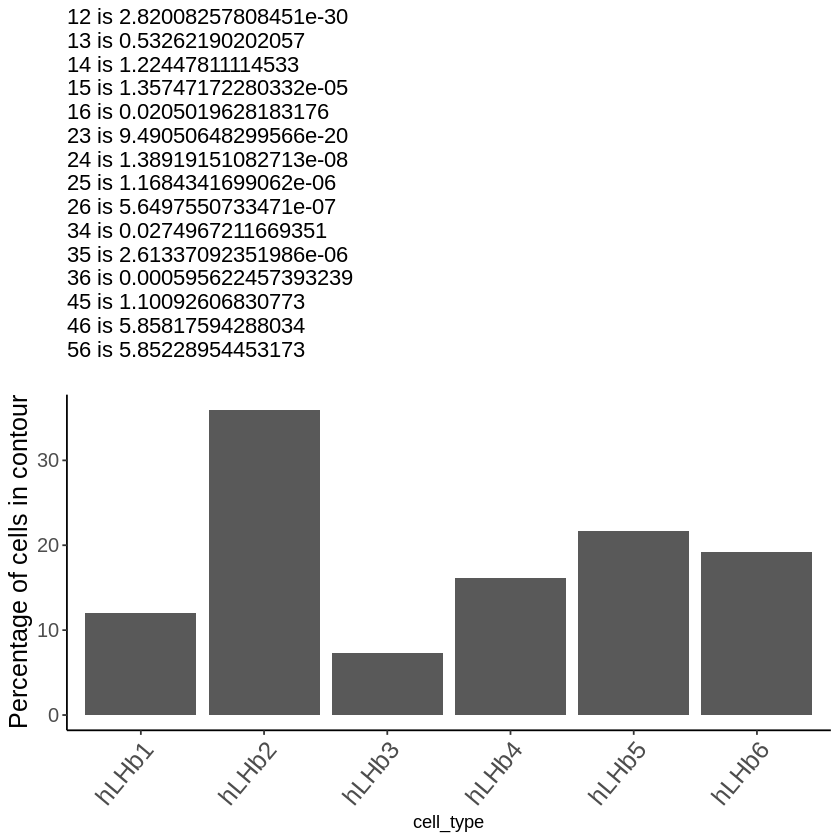

In [304]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_density contour_overlap_anteiror.pdf",width=8,height=10)

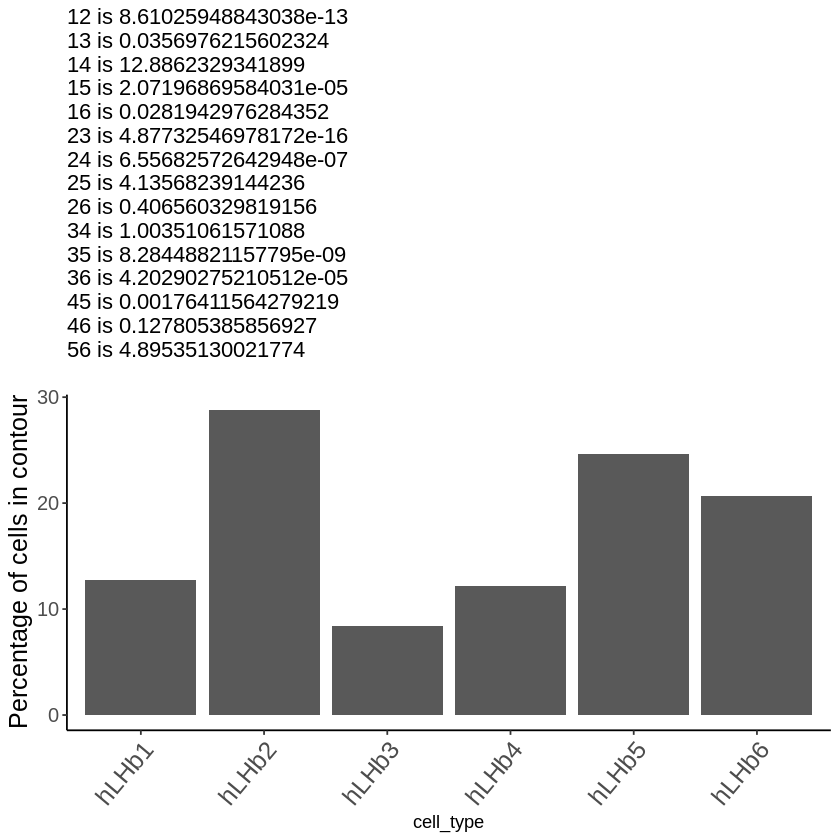

In [308]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_density contour_overlap_middle.pdf",width=8,height=10)

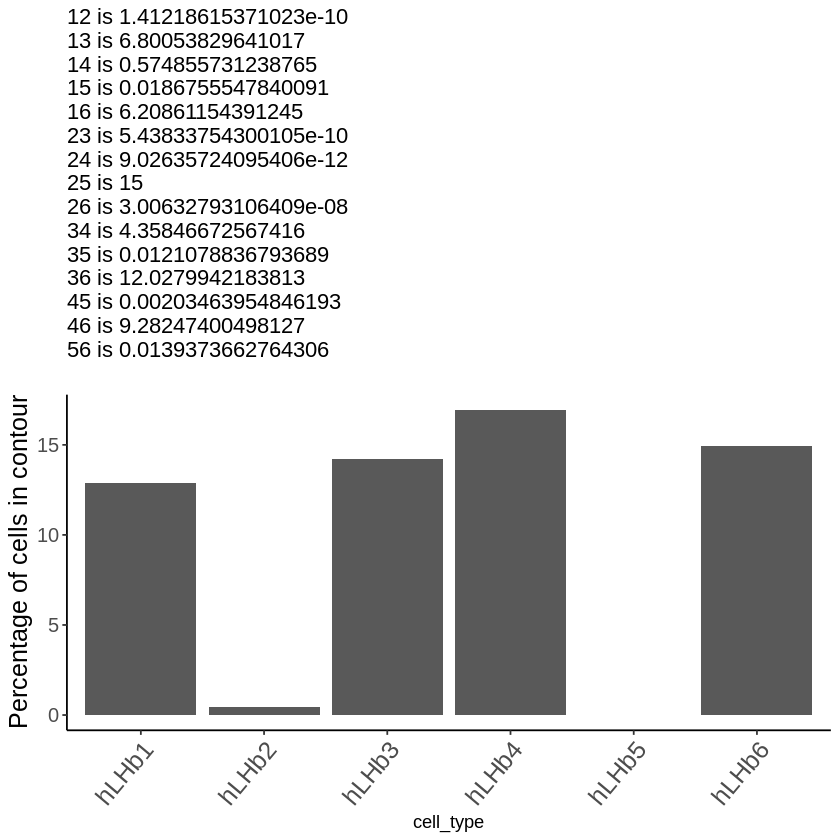

In [227]:
ggplot(df,aes(x=cell_type,y=percentage))+geom_bar(stat="identity")+ylab("Percentage of cells in contour")+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+
ggtitle(paste("12 is ",p1,"\n","13 is ",p2,"\n","14 is ",p3,"\n","15 is ",p4,"\n","16 is ",p5,"\n","23 is ",p6,"\n","24 is ",p7,"\n","25 is ",p8,"\n","26 is ",p9,"\n","34 is ",p10,"\n","35 is ",p11,"\n","36 is ",p12,"\n","45 is ",p13,"\n","46 is ",p14,"\n","56 is ",p15,"\n",sep=""))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/RNAscope/LHb_density contour_overlap_posterior.pdf",width=8,height=10)